<a href="https://colab.research.google.com/github/SeongwonTak/-KDT-_AI_2_Notes/blob/main/ML/LinReg_KDT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [13]:
rng = np.random.RandomState(9)

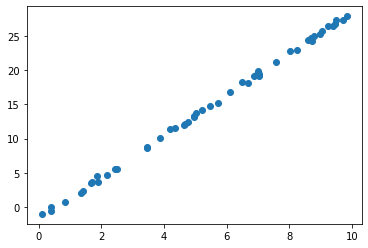

In [14]:
# 노이즈가 포함된 직선을 만듬
x = 10 * rng.rand(50)
y = 3 * x - 2 + rng.rand(50)
plt.scatter(x, y)
plt.show()

In [18]:
x.shape

(50,)

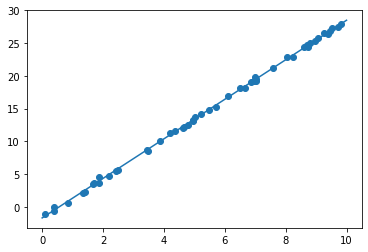

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept = True)

#np.newaxis를 하는 이유는 2차원을 만들어주기 위해.

model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit)

In [19]:
print("model slope: ", model.coef_[0])
print("model intercept: ", model.intercept_)

model slope:  3.0173889712233426
model intercept:  -1.6787574965144838


In [22]:
# 다차원의 경우
x = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(x, [1.5, -2, 2])+rng.rand(100)


In [24]:
model.fit(x, y)
print("model slope: ", model.coef_)
print("model intercept: ", model.intercept_)

model slope:  [ 1.5005945  -2.00095018  1.98959363]
model intercept:  1.0506214008525117


## 다항함수로의 확장
기저 함수를 $x^{n}$으로 확장하게 되면, 여전히 계수에 대해서는 선형이다.
따라서, 선형 모델을 여전히 활용할 수 있다.

scikit-learn에는 Polynomial Features라는 거를 통해 다항 기저함수를 정의할 수 있다.

In [26]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias = False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [27]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

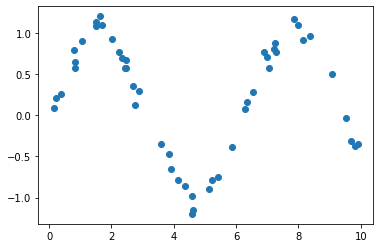

In [30]:
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)
plt.scatter(x, y)
plt.show()

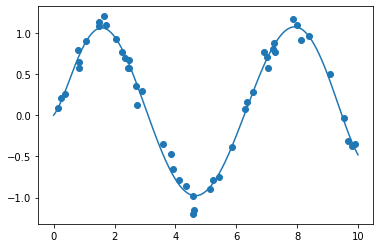

In [32]:
poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:,np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)

In [33]:
print(poly_model)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=7, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)


# 규제함수의 적용
모델이 필요 이상으로 flex해질 경우, 극단적인 계수 값을 가지게 된다. (과적합 문제 - Overfitting), 


### L-2 Regulariztion Ridge 회귀
제곱합 기반

### L-1 Regularization  Lasso 회귀
계수들의 절대값 합